# Ensure PySpark is Working

In [1]:
%info

# Part I: Installation and Initial Setup

### Install Packages: pandas, matplotlib, seaborn

In [2]:
sc.install_pypi_package("pandas==1.0.3")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1588633798734_0001,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
sc.install_pypi_package("matplotlib==3.2.1")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
sc.install_pypi_package("seaborn==0.10.0")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### View Available Packages

In [5]:
sc.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version
-------------------------- -------
beautifulsoup4             4.8.1
boto                       2.49.0
cycler                     0.10.0
jmespath                   0.9.4
kiwisolver                 1.2.0
lxml                       4.4.2
matplotlib                 3.2.1
mysqlclient                1.4.6
nltk                       3.4.5
nose                       1.3.4
numpy                      1.14.5
pandas                     1.0.3
pip                        20.1
py-dateutil                2.2
pyparsing                  2.4.7
python-dateutil            2.8.1
python36-sagemaker-pyspark 1.2.6
pytz                       2019.3
PyYAML                     3.11
scipy                      1.4.1
seaborn                    0.10.0
setuptools                 46.1.3
six                        1.13.0
soupsieve                  1.9.5
wheel                      0.34.2
windmill                   1.6

### Import Applicable Packages

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Load Data from s3 Into a Dataframe Object

loading business.json from a subfolder

format: s3://[S3_Bucket_Name]/[Subfolder_Name]/.json

path: s3://sta9760-yelp-business/*.json

In [8]:
bus_df = spark.read.json('s3://sta9760-yelp-datasets/yelp-business/*business.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Overview of Data

##### Display the number of rows and columns in our dataset

In [9]:
print(f"Columns: {len(bus_df.dtypes)} | Rows: {bus_df.count()}")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Columns: 14 | Rows: 209393

##### Display the DataFrame schema 

In [10]:
bus_df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

##### Display the first 5 rows with the following columns:

    - business_id
    - name
    - city
    - state
    - categories

In [11]:
bus_df.select('business_id','name','city','state','categories').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+---------------+-----+--------------------+
|         business_id|                name|           city|state|          categories|
+--------------------+--------------------+---------------+-----+--------------------+
|f9NumwFMBDn751xgF...|The Range At Lake...|      Cornelius|   NC|Active Life, Gun/...|
|Yzvjg0SayhoZgCljU...|   Carlos Santo, NMD|     Scottsdale|   AZ|Health & Medical,...|
|XNoUzKckATkOD1hP6...|             Felinus|       Montreal|   QC|Pets, Pet Service...|
|6OAZjbxqM5ol29BuH...|Nevada House of Hose|North Las Vegas|   NV|Hardware Stores, ...|
|51M2Kk903DFYI6gnB...|USE MY GUY SERVIC...|           Mesa|   AZ|Home Services, Pl...|
+--------------------+--------------------+---------------+-----+--------------------+
only showing top 5 rows

# Part II: Analyzing Categories

###### how many unqiue categories are represented in this dataset?


The Categories column is a categories list per business, which mean that one business falls under more than a single category. Building an association table map a single business id multiple times to each distinct category will help to answer the above question.

### Assoication Table

import the approiate functions 

In [12]:
from pyspark.sql.functions import explode, split

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

create a new dataframe with a new column named `category` from the business dataframe.

each row of that column will represent 1 category instead of list of category in relation to business_id

In [13]:
cat_df = bus_df.withColumn('category', explode(split('categories',', ')))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

###### Display the first 5 rows of association table

In [14]:
cat_df.select('business_id','category').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----------------+
|         business_id|        category|
+--------------------+----------------+
|f9NumwFMBDn751xgF...|     Active Life|
|f9NumwFMBDn751xgF...|Gun/Rifle Ranges|
|f9NumwFMBDn751xgF...|     Guns & Ammo|
|f9NumwFMBDn751xgF...|        Shopping|
|Yzvjg0SayhoZgCljU...|Health & Medical|
+--------------------+----------------+
only showing top 5 rows

### Total Unique Categories

The total number of unique categories available:

In [15]:
cat_df.select('category').distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1336

### Top Categories By Business

###### Display the per count value of businesses per category

In [16]:
cat_df.groupby('category').count().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-----+
|           category|count|
+-------------------+-----+
|     Dermatologists|  341|
|   Historical Tours|   54|
|Mobile Home Dealers|   16|
|     Paddleboarding|   36|
|   Hot Air Balloons|   21|
|       Aerial Tours|   28|
|      Skating Rinks|  104|
|  Signature Cuisine|    1|
|             Fondue|   54|
|      Data Recovery|  195|
|  Pet Waste Removal|   34|
|      Videographers|  169|
|    Pet Photography|   49|
|        Boat Repair|  100|
|            Beaches|   74|
|       Contract Law|   13|
|        Hobby Shops|  828|
|           Day Spas| 2880|
|              Reiki|  312|
|           Honduran|    8|
+-------------------+-----+
only showing top 20 rows

### Bar Chart of Top Categories

Before build a barchart of the top 20 categories, convert the df to pandas

In [17]:
pcat_df = cat_df.groupby('category').count().orderBy('count', ascending=False).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Take a look at it

In [18]:
pcat_df

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

               category  count
0           Restaurants  63944
1              Shopping  34644
2                  Food  32991
3         Home Services  22487
4         Beauty & Spas  20520
...                 ...    ...
1331  General Festivals      1
1332   Eastern European      1
1333  Entertainment Law      1
1334           Backshop      1
1335     Halfway Houses      1

[1336 rows x 2 columns]

Set the Category column as index for better visualization

In [19]:
pcat_df = pcat_df.set_index('category')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [20]:
pcat_df

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                   count
category                
Restaurants        63944
Shopping           34644
Food               32991
Home Services      22487
Beauty & Spas      20520
...                  ...
General Festivals      1
Eastern European       1
Entertainment Law      1
Backshop               1
Halfway Houses         1

[1336 rows x 1 columns]

###### Graph it!

In [21]:
catplot = pcat_df.head(20).plot(kind='barh', color='#91A8d0', figsize=(12,8), legend=None)

# count read from top to bottom
catplot.invert_yaxis()

# remove the axis lines
catplot.spines['right'].set_visible(False)
catplot.spines['left'].set_visible(False)
catplot.spines['top'].set_visible(False)
catplot.spines['bottom'].set_visible(False)

# labels and title
catplot.set_ylabel("Categorties")
catplot.set_xlabel("Count")
catplot.set_title("Top Categories by Business", fontsize=20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Text(0.5, 1.0, 'Top Categories by Business')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

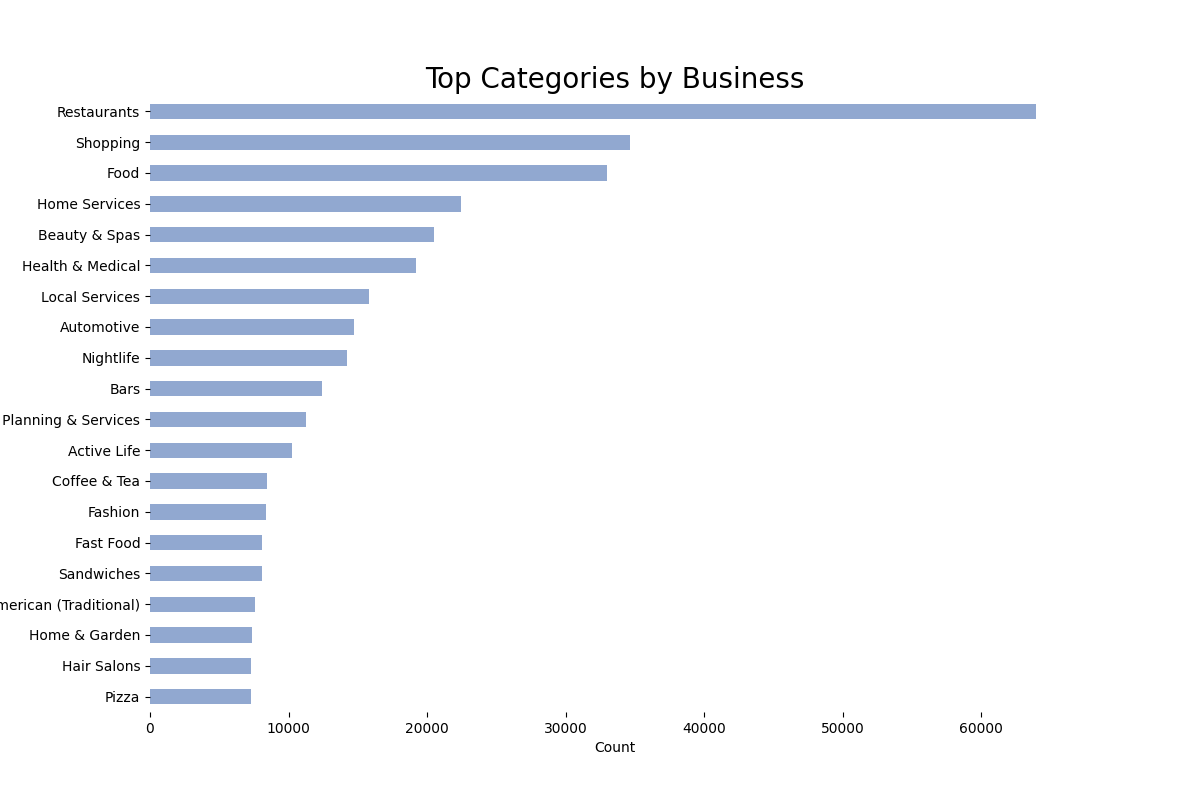

In [22]:
%matplot plt

# Part III: Do Yelp Reviews Skew Negative?

### Load Review Data

###### loading the review data set from s3 and printing schema to determine what data is available

In [23]:
rev_df = spark.read.json('s3://sta9760-yelp-datasets/*review.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [24]:
rev_df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

###### listing the `business_id` and `stars` columns together 

In [25]:
rev_df.select('business_id','stars').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|-MhfebM0QIsKt87iD...|  2.0|
|lbrU8StCq3yDfr-QM...|  1.0|
|HQl28KMwrEKHqhFrr...|  5.0|
|5JxlZaqCnk1MnbgRi...|  1.0|
|IS4cv902ykd8wj1TR...|  4.0|
+--------------------+-----+
only showing top 5 rows

### Aggregate the stars column to display average stars per business

import the average function from sparksql 

In [26]:
from pyspark.sql.functions import avg

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [27]:
agg_df = rev_df.groupBy('business_id').agg(avg('stars').alias('avg_stars'))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [28]:
agg_df.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|         business_id|         avg_stars|
+--------------------+------------------+
|ATeOjZzE3VOI-RW7F...| 3.433734939759036|
|RMjCnixEY5i12Ciqn...|3.5316455696202533|
|vbUABNAQI2iwN7v0x...|2.4545454545454546|
|VHsNB3pdGVcRgs6C3...| 3.411764705882353|
|r-W1HPIZ3V6S2DaXh...| 4.852459016393443|
+--------------------+------------------+
only showing top 5 rows

### Join Aggreagated Dataframe and Original Business Dataframe by `business_id`

In [29]:
joinedDF = agg_df.join(bus_df, 'business_id')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

###### Display few data

In [30]:
joinedDF.select('avg_stars','stars','name','city','state').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+-----+--------------------+-----------+-----+
|         avg_stars|stars|                name|       city|state|
+------------------+-----+--------------------+-----------+-----+
|  4.11784140969163|  4.0|Delmonico Steakhouse|  Las Vegas|   NV|
|2.3333333333333335|  2.5|Neo-Paws Internat...|    Toronto|   ON|
|             4.375|  4.5| McFarling Law Group|  Las Vegas|   NV|
|3.3333333333333335|  3.5|Volvo of Mississauga|Mississauga|   ON|
|               5.0|  5.0|Andre Agassi Coll...|  Las Vegas|   NV|
+------------------+-----+--------------------+-----------+-----+
only showing top 5 rows

### Compute the skewness

###### a new dataframe that calculate the skew bewtween the average stars accumulated from written reviews and the actual star rating of a business


(row['avg(stars)'] - row['stars']) / row['stars']

In [31]:
from pyspark.sql.functions import col, lit

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [32]:
skewdf = joinedDF.select( (col('avg_stars') - col('stars') ) / lit(col('stars')))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

clear the previous catplot before skewplot

In [33]:
plt.clf()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

###### Convert the df to pandas

In [34]:
pskewdf = skewdf.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [35]:
skewplot = sns.distplot(pskewdf, kde = True, color = "#91A8d0")

# remove the axis lines
skewplot.spines['right'].set_visible(False)
skewplot.spines['left'].set_visible(False)
skewplot.spines['top'].set_visible(False)
skewplot.spines['bottom'].set_visible(False)


skewplot.set_title("Top Categories by Business", fontsize=20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Text(0.5, 1.0, 'Top Categories by Business')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

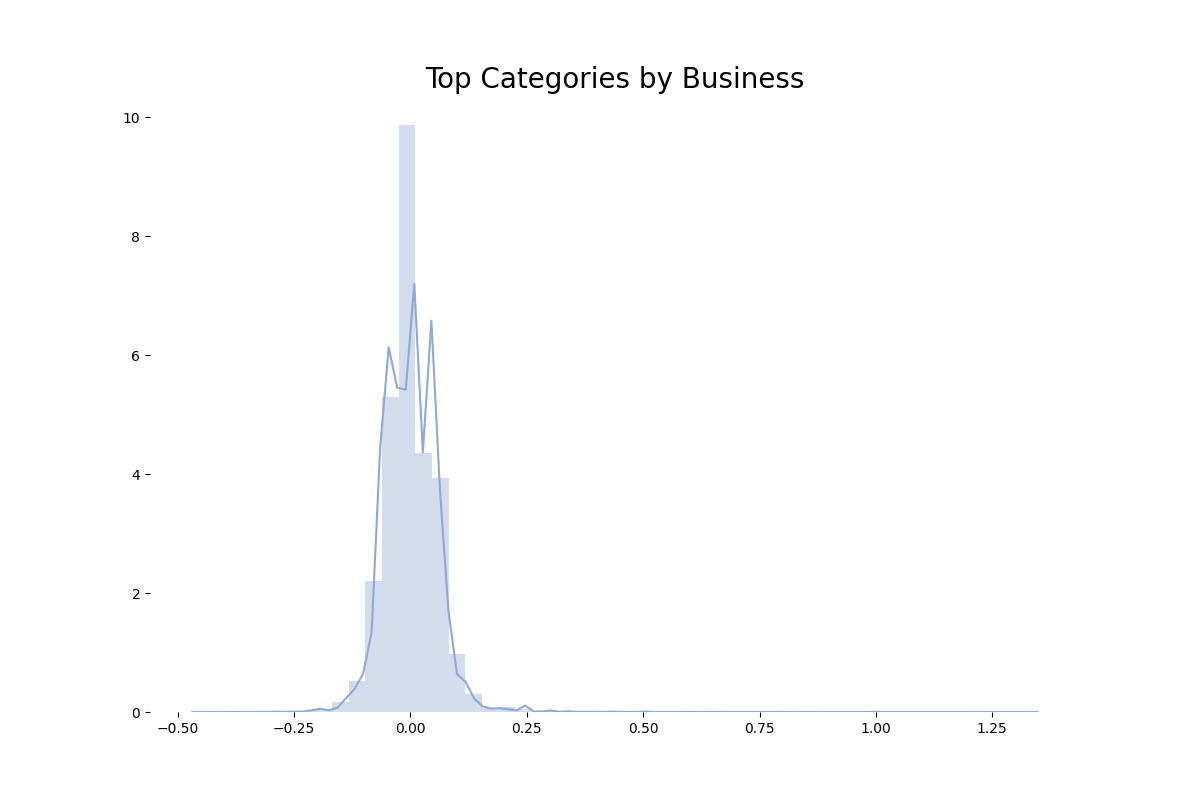

In [36]:
%matplot plt

It slightly skewed to the positive side, however we cannot conclude that reviewers who left a written response were more satisfied than normal reviewers. Further analysis should be done in order to conclude.

# Part IV: Should the Elite be Trusted?

### Load User Data

###### loading the user data set from s3 and printing schema to determine what data is available

In [37]:
user_df = spark.read.json('s3://sta9760-yelp-datasets/yelp-user/*user.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [38]:
user_df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)

###### Before combining the original business and review datasets, rename column name is needed because all three datasets have few same column name.

In [92]:
b_df = bus_df.withColumnRenamed('stars','bus_stars')
r_df = rev_df.withColumnRenamed('stars','r_user_stars')
mergDF = user_df.join(r_df,'user_id','inner').join(b_df,'business_id','inner')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [93]:
mergDF.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- yelping_since: string (nullable = true)
 |-- cool: long (nullable =

###### Create a subset only contain the needed data

In [94]:
sub_df = mergDF.select('elite','user_id','business_id','r_user_stars','bus_stars')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [95]:
sub_df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- elite: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- business_id: string (nullable = true)
 |-- r_user_stars: double (nullable = true)
 |-- bus_stars: double (nullable = true)

In [47]:
sub_df.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+--------------------+------------+---------+
|               elite|             user_id|         business_id|r_user_stars|bus_stars|
+--------------------+--------------------+--------------------+------------+---------+
|                    |-0Ji0nOyFe-4yo8BK...|pmrHuQiy25xKB86tb...|         4.0|      4.0|
|                    |-0XPr1ilUAfp-yIXZ...|QhwaGi1niDeVEHMRt...|         2.0|      2.5|
|2011,2012,2013,20...|-1KKYzibGPyUX-Mwk...|L772e6l2Yd0DJEyCB...|         4.0|      3.0|
|                    |-1zQA2f_syMAdA04P...|DyYS-JKXlW2PCr_Gt...|         5.0|      3.5|
|                    |-1zQA2f_syMAdA04P...|aNe8ofTYrealxqv7V...|         5.0|      3.5|
+--------------------+--------------------+--------------------+------------+---------+
only showing top 5 rows

###### Add a new column that determine whether a user is elite by interpreting row value of `elite` is not empty

In [48]:
from pyspark.sql.functions import when,col

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [49]:
s_df = sub_df.withColumn('is_elite', when(col("elite")=="","Yes").otherwise("No"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [50]:
s_df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- elite: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- business_id: string (nullable = true)
 |-- r_user_stars: double (nullable = true)
 |-- bus_stars: double (nullable = true)
 |-- is_elite: string (nullable = false)

In [56]:
s_df.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+--------------------+------------+---------+--------+
|               elite|             user_id|         business_id|r_user_stars|bus_stars|is_elite|
+--------------------+--------------------+--------------------+------------+---------+--------+
|                    |-0Ji0nOyFe-4yo8BK...|pmrHuQiy25xKB86tb...|         4.0|      4.0|     Yes|
|                    |-0XPr1ilUAfp-yIXZ...|QhwaGi1niDeVEHMRt...|         2.0|      2.5|     Yes|
|2011,2012,2013,20...|-1KKYzibGPyUX-Mwk...|L772e6l2Yd0DJEyCB...|         4.0|      3.0|      No|
|                    |-1zQA2f_syMAdA04P...|DyYS-JKXlW2PCr_Gt...|         5.0|      3.5|     Yes|
|                    |-1zQA2f_syMAdA04P...|aNe8ofTYrealxqv7V...|         5.0|      3.5|     Yes|
|                    |-1zQA2f_syMAdA04P...|5c-b0ALS_DyLvRCGr...|         1.0|      2.5|     Yes|
|                    |-1zQA2f_syMAdA04P...|fuC3sui68QWg-rqld...|         1.0|      3.0|     Yes|
|                    |-1zQA2f_

###### Create a SQL view to analyze the data, separete by elite and non-elite

In [62]:
s_df.createOrReplaceTempView('yelp')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [78]:
elite_sk = spark.sql(
    '''
    SELECT (r_user_stars-bus_stars)/bus_stars as skewness
    FROM yelp
    WHERE is_elite='Yes'
    ''' 
)

e = elite_sk.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [79]:
#clear the previous image 
plt.clf()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [80]:
test = sns.distplot(e)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

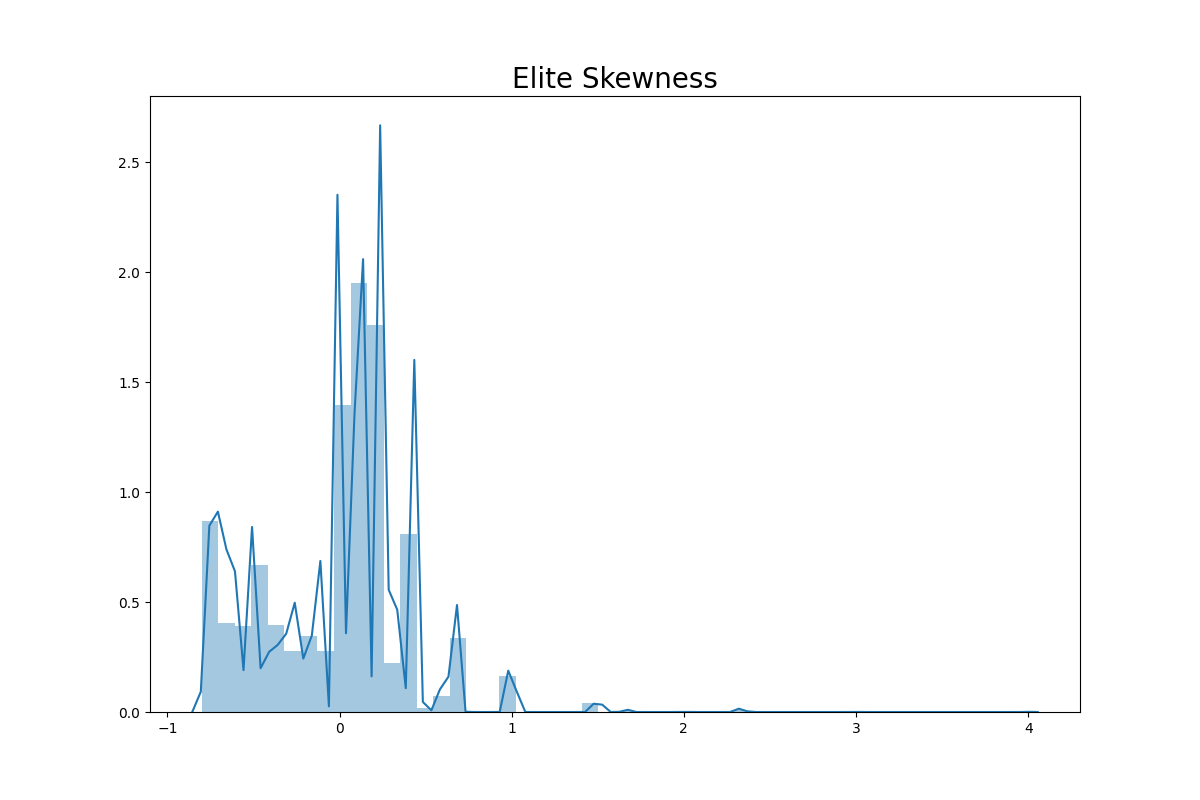

In [81]:
test.set_title("Elite Skewness", fontsize=20)

%matplot plt

###### Distbrution plot might not be the best way to plot it. Let's try with boxplot.

outliners are removed for better view.

In [116]:
plt.clf()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [117]:
eplot = sns.boxplot(e, color = "#91A8d0", showfliers = False)

# remove the axis lines
eplot.spines['right'].set_visible(False)
eplot.spines['left'].set_visible(False)
eplot.spines['top'].set_visible(False)
eplot.spines['bottom'].set_visible(False)

eplot.set_xlabel('skew')
eplot.set_title("Elite Skewness", fontsize=20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Text(0.5, 1.0, 'Elite Skewness')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

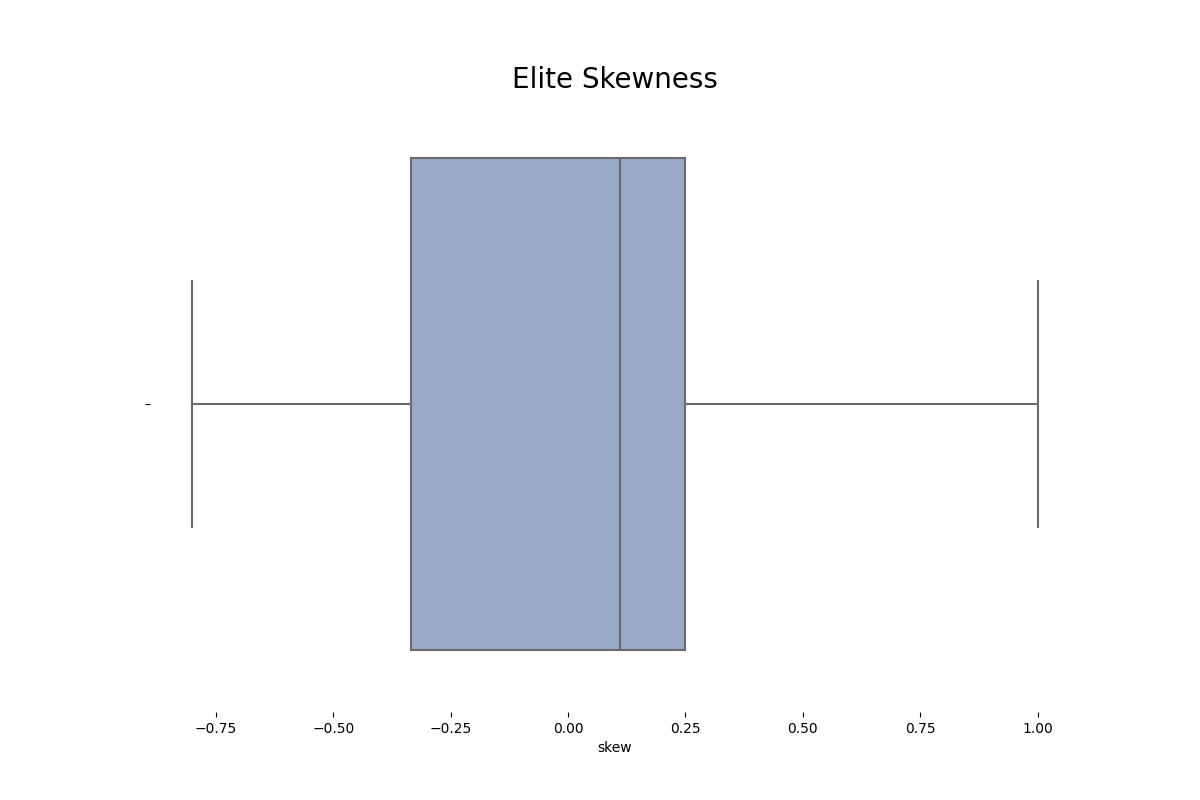

In [118]:
%matplot plt

In [85]:
nonelite_sk = spark.sql(
    '''
    SELECT (r_user_stars-bus_stars)/bus_stars as skewness
    FROM yelp
    WHERE is_elite='No'
    ''' 
)

ne = nonelite_sk.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [120]:
plt.clf()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [121]:
neplot = sns.boxplot(ne, color = "#FFB6C1", showfliers = False)

# remove the axis lines
neplot.spines['right'].set_visible(False)
neplot.spines['left'].set_visible(False)
neplot.spines['top'].set_visible(False)
neplot.spines['bottom'].set_visible(False)

neplot.set_xlabel('skew')
neplot.set_title("Non-Elite Skewness", fontsize=20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Text(0.5, 1.0, 'Non-Elite Skewness')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

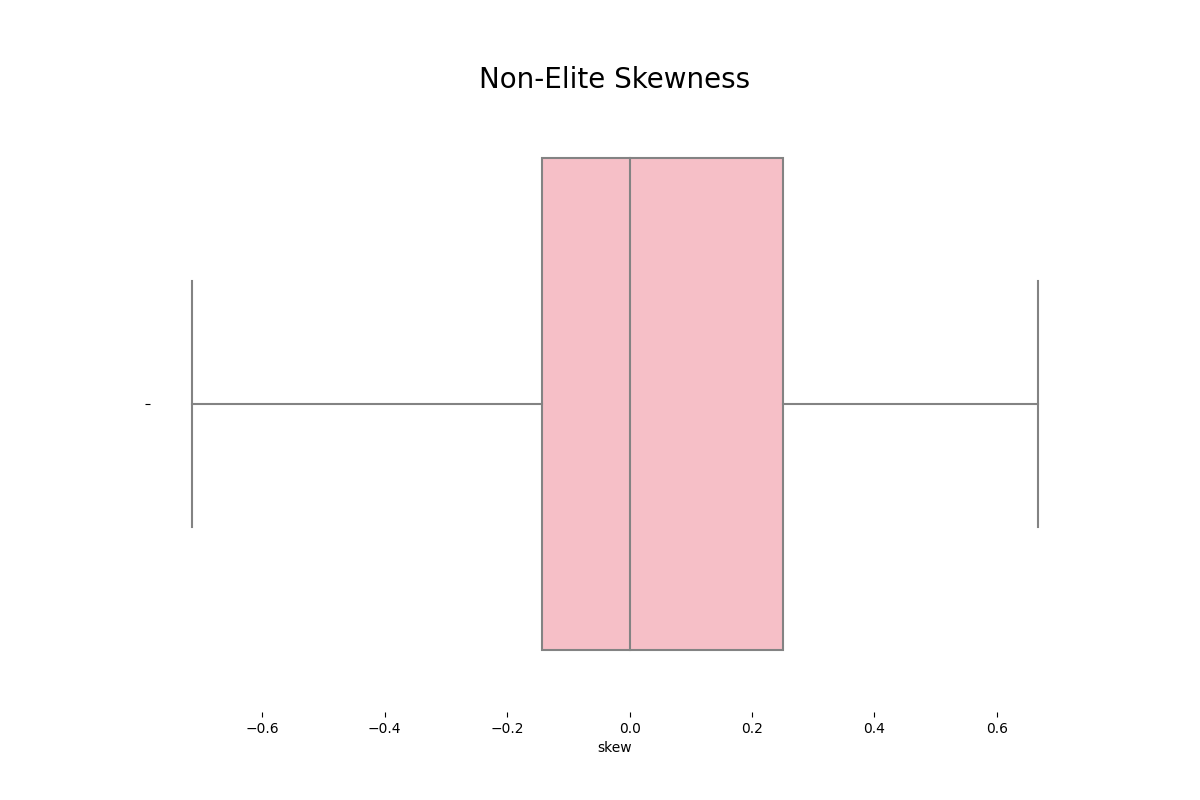

In [122]:
%matplot plt

As the two data distribution show above, elite users trend to give lower rating than the business's rating. Non-elite users trend to give slightly positive reviews. Further analysis is needed to understand better. 